# NAMA : Alisha Zahra Saadiya
# NIM : 2501971742
# KELAS : LB06

## 2. You are a Machine Learning Engineer in a company that works in the global sector. Datasets are divided into two types: Data A will be used by students with odd Student IDs, and Data B will be used by students with even Student IDs. After downloading the dataset that suits you, then create a Convolutional Neural Network architecture for this Image binary classification problem with the following conditions:

### a. Perform data augmentation if necessary and resize the image resolution to 64 x 64.

In [ ]:
# Import library yang dibutuhkan
import keras.layers as layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense, Convolution2D, BatchNormalization, AveragePooling2D
from keras import backend as k
from keras import optimizers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [ ]:
!unzip Data\ B.zip

Archive:  Data B.zip
   creating: Data B/
   creating: Data B/dataset/
   creating: Data B/dataset/test/
   creating: Data B/dataset/test/Anemone Dahlias/
  inflating: Data B/dataset/test/Anemone Dahlias/Image_106.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_107.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_108.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_109.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_110.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_111.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_112.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_113.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_114.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_115.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_116.jpg  
 extracting: Data B/dataset/test/Anemone Dahlias/Image_117.jpg  
  inflating: Data B/dataset/test/Anemone Dahlias/Image_118.jpg  


In [ ]:
# Memuat data training dan testing
train = '/content/Data B/dataset/train'
test = '/content/Data B/dataset/test'
val = '/content/Data B/dataset/val'

In [ ]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224,224,3)))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(5, 5), activation='relu', padding='valid'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))

model.add(Dense(4096, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    horizontal_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(
    rescale= 1./255
)

test_datagen = ImageDataGenerator(
    rescale= 1./255
)

### b. Make the baseline architecture according to Figure 1 below: (Note: Activation function for each hidden layer using ReLU, last layer using softmax). Display validation loss and training loss graphs. Explain whether the model is overfit, underfit or just-right model?

In [ ]:
batch_size = 36
image_height, image_width = 224, 224

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)
test_generator = test_datagen.flow_from_directory(
    test,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)
val_generator = val_datagen.flow_from_directory(
    val,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)

Found 168 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= ["accuracy"]
             )

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 384)       885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 384)      

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs = 20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/20
5/5 [==============================] - 26s 4s/step - loss: 0.7140 - accuracy: 0.4191 - val_loss: 0.6945 - val_accuracy: 0.5312
Epoch 2/20
5/5 [==============================] - 23s 4s/step - loss: 0.7064 - accuracy: 0.4853 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 22s 4s/step - loss: 0.6896 - accuracy: 0.5515 - val_loss: 0.7000 - val_accuracy: 0.4688
Epoch 4/20
5/5 [==============================] - 20s 4s/step - loss: 0.6986 - accuracy: 0.5147 - val_loss: 0.6909 - val_accuracy: 0.5312
Epoch 5/20
5/5 [==============================] - 22s 4s/step - loss: 0.6936 - accuracy: 0.5882 - val_loss: 0.6920 - val_accuracy: 0.5625
Epoch 6/20
5/5 [==============================] - 24s 5s/step - loss: 0.6927 - accuracy: 0.4938 - val_loss: 0.6924 - val_accuracy: 0.5312
Epoch 7/20
5/5 [==============================] - 24s 5s/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.4375
Epoch 8/20
5/5 [==================

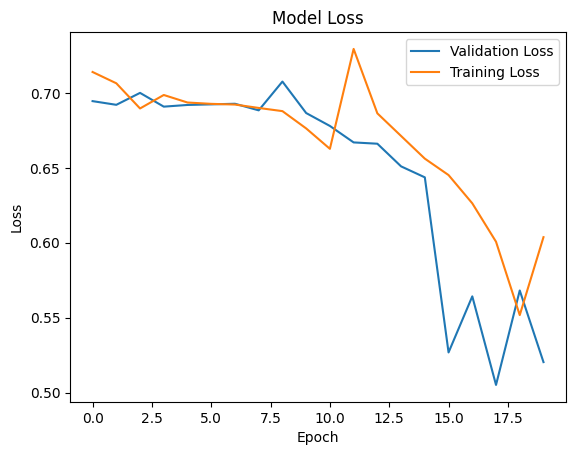

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Training Loss'], loc='upper right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_zip_file = '/content/drive/My Drive/Data B edit'

In [ ]:
# Memuat data training dan testing
train_df = '/content/drive/MyDrive/Data B edit/Data B/dataset/train'
test_df = '/content/drive/MyDrive/Data B edit/Data B/dataset/test'
val_df = '/content/drive/MyDrive/Data B edit/Data B/dataset/val'

In [ ]:
model_df = Sequential()
model_df.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224,224,3)))

model_df.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model_df.add(Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))

model_df.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model_df.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))

model_df.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))

model_df.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

model_df.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model_df.add(Flatten())

model_df.add(Dense(4096, activation='relu'))

model_df.add(Dense(4096, activation='relu'))

model_df.add(Dense(2, activation='softmax'))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

val_datagen = ImageDataGenerator(
    rescale= 1./255
)

test_datagen = ImageDataGenerator(
    rescale= 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_df,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)
test_generator = test_datagen.flow_from_directory(
    test_df,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)
val_generator = val_datagen.flow_from_directory(
    val_df,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)

Found 167 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
model_df.compile(loss = 'categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics= ["accuracy"]
             )

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=5
                             )
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1,
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=2,
                              min_lr=0.00001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [ ]:
history_df = model_df.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs = 30,
    callbacks = callbacks,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 0.5728 - accuracy: 0.7252
Epoch 1: val_loss improved from inf to 0.60089, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 10s 3s/step - loss: 0.5728 - accuracy: 0.7252 - val_loss: 0.6009 - val_accuracy: 0.6667 - lr: 1.0000e-05
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 0.6129 - accuracy: 0.6870
Epoch 2: val_loss did not improve from 0.60089
4/4 [==============================] - 3s 986ms/step - loss: 0.6129 - accuracy: 0.6870 - val_loss: 0.6120 - val_accuracy: 0.6944 - lr: 1.0000e-05
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.5691 - accuracy: 0.6794
Epoch 3: val_loss did not improve from 0.60089
4/4 [==============================] - 3s 921ms/step - loss: 0.5691 - accuracy: 0.6794 - val_loss: 0.6113 - val_accuracy: 0.5833 - lr: 1.0000e-05
Epoch 4/30
4/4 [==============================] - ETA: 0s - loss: 0.5567 - accuracy: 0.7361
Epoch 4: val_loss improved from 0.60089 to 0.58826, saving model to model.h5
4/4 [==============================] - 7s 2s/step - loss: 0.5567 - accuracy: 0.7361 - val_loss: 0.5883 - val_accuracy

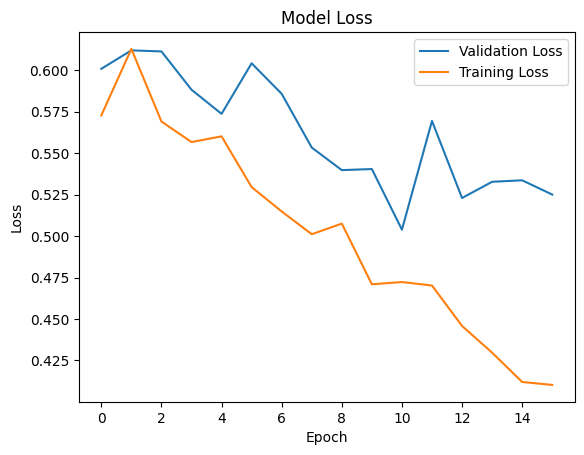

In [ ]:
plt.plot(history_df.history['val_loss'])
plt.plot(history_df.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Training Loss'], loc='upper right')
plt.show()

In [ ]:
base_loss,base_acc=model_df.evaluate(test_generator)
print("Accuracy of CNN Model: ",base_acc)
print("Loss of CNN Model: ",base_loss)

2/2 [==============================] - 2s 1s/step - loss: 0.5582 - accuracy: 0.7000
Accuracy of CNN Model:  0.699999988079071
Loss of CNN Model:  0.5582008957862854


### c. Modify the architecture in number 2b by using dropout, batch normalization, and other methods. Give reasons why your architecture modification is better than the benchmark.

In [ ]:
model2 = keras.Sequential()
model2.add(layers.Conv2D(filters=96, kernel_size=(11, 11),
                        strides=(4, 4), activation="relu",
                        input_shape=(224, 224, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model2.add(layers.Conv2D(filters=256, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu",
                        padding="valid"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model2.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(filters=256, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(4096, activation="relu"))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(2, activation="softmax"))
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_68 (Ba  (None, 54, 54, 96)        384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 22, 22, 256)       614656    
                                                                 
 batch_normalization_69 (Ba  (None, 22, 22, 256)       1024      
 tchNormalization)                                               
                                                     

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_df,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)
test_generator = test_datagen.flow_from_directory(
    test_df,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)
val_generator = val_datagen.flow_from_directory(
    val_df,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = "categorical"
)

Found 167 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.SGD(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=5
                             )
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1,
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=2,
                              min_lr=0.00001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [ ]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs = 40,
    callbacks = callbacks,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/40
4/4 [==============================] - ETA: 0s - loss: 0.2589 - accuracy: 0.8779
Epoch 1: val_loss improved from inf to 0.70382, saving model to model.h5
4/4 [==============================] - 4s 1s/step - loss: 0.2589 - accuracy: 0.8779 - val_loss: 0.7038 - val_accuracy: 0.5278 - lr: 1.0000e-04
Epoch 2/40
4/4 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.8779
Epoch 2: val_loss did not improve from 0.70382
4/4 [==============================] - 3s 943ms/step - loss: 0.3179 - accuracy: 0.8779 - val_loss: 0.7259 - val_accuracy: 0.4722 - lr: 1.0000e-04
Epoch 3/40
4/4 [==============================] - ETA: 0s - loss: 0.3127 - accuracy: 0.8750
Epoch 3: val_loss did not improve from 0.70382

Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
4/4 [==============================] - 2s 704ms/step - loss: 0.3127 - accuracy: 0.8750 - val_loss: 0.7199 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/40
4/4 [============================

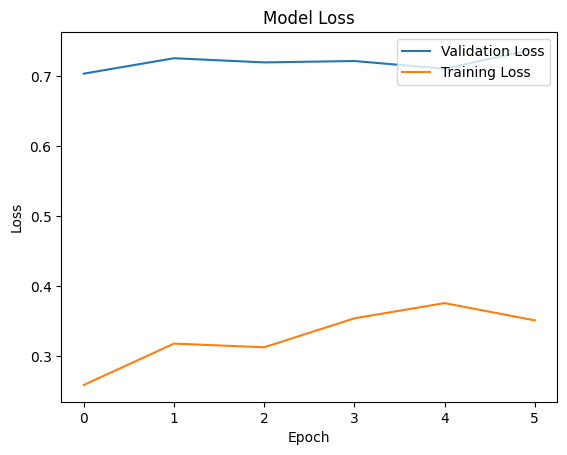

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['val_loss'])
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Training Loss'], loc='upper right')
plt.show()

In [ ]:
base_loss,base_acc=model2.evaluate(test_generator)
print("Accuracy of CNN Model: ",base_acc)
print("Loss of CNN Model: ",base_loss)

2/2 [==============================] - 0s 35ms/step - loss: 0.7085 - accuracy: 0.5250
Accuracy of CNN Model:  0.5249999761581421
Loss of CNN Model:  0.7084783315658569


https://akademi-ai.medium.com/deep-learning-klasifikasi-gambar-dengan-convolutional-neural-network-menggunakan-keras-python-87bb08a47ca6
https://medium.com/latinxinai/convolutional-neural-network-from-scratch-6b1c856e1c07

In [ ]:
AveragePooling2D,
lenet = Sequential(name="LeNet-5")
lenet.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='tanh', input_shape=(224,224,3)))

lenet.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

lenet.add(Conv2D(256, kernel_size=(5, 5), activation='tanh', padding='same'))

lenet.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

lenet.add(Conv2D(384, kernel_size=(3, 3), activation='tanh', padding='same'))

lenet.add(Conv2D(384, kernel_size=(3, 3), activation='tanh', padding='same'))

lenet.add(Conv2D(256, kernel_size=(3, 3), activation='tanh', padding='same'))

lenet.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

lenet.add(Flatten())

lenet.add(Dense(4096, activation='tanh'))

lenet.add(Dense(4096, activation='tanh'))

lenet.add(Dense(2, activation='softmax'))

In [ ]:
lenet.compile(loss = 'categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics= ["accuracy"]
             )

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=5
                             )
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1,
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=2,
                              min_lr=0.0001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [ ]:
historylenet = lenet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs = 25,
    callbacks = callbacks,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/25
4/4 [==============================] - ETA: 0s - loss: 0.7220 - accuracy: 0.4733
Epoch 1: val_loss improved from 0.69481 to 0.69285, saving model to model.h5
4/4 [==============================] - 14s 4s/step - loss: 0.7220 - accuracy: 0.4733 - val_loss: 0.6929 - val_accuracy: 0.5278 - lr: 1.0000e-04
Epoch 2/25
4/4 [==============================] - ETA: 0s - loss: 0.6986 - accuracy: 0.5344
Epoch 2: val_loss did not improve from 0.69285
4/4 [==============================] - 3s 812ms/step - loss: 0.6986 - accuracy: 0.5344 - val_loss: 0.7154 - val_accuracy: 0.4722 - lr: 1.0000e-04
Epoch 3/25
4/4 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5267
Epoch 3: val_loss did not improve from 0.69285
4/4 [==============================] - 3s 1s/step - loss: 0.6934 - accuracy: 0.5267 - val_loss: 0.6998 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/25
4/4 [==============================] - ETA: 0s - loss: 0.7098 - accuracy: 0.4733
Epoch 4: val_loss did not im

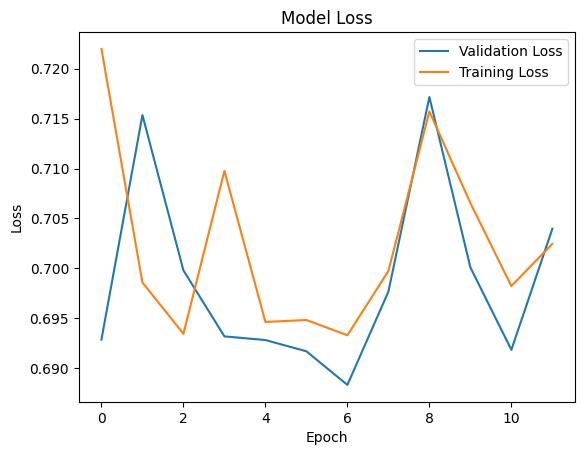

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historylenet.history['val_loss'])
plt.plot(historylenet.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Training Loss'], loc='upper right')
plt.show()

In [ ]:
base_loss,base_acc=lenet.evaluate(test_generator)
print("Accuracy of CNN Model: ",base_acc)
print("Loss of CNN Model: ",base_loss)

2/2 [==============================] - 0s 32ms/step - loss: 0.6932 - accuracy: 0.5250
Accuracy of CNN Model:  0.5249999761581421
Loss of CNN Model:  0.6932251453399658


https://medium.com/@shaleenag/lenet-5-cnn-architecture-468ed7b895cd

In [ ]:
vgg = Sequential(name="VGG16")

vgg.add(Conv2D(64, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224,224,3)))

vgg.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

vgg.add(Conv2D(256, kernel_size=(5, 5), activation='relu', padding='valid'))

vgg.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

vgg.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))

vgg.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))

vgg.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

vgg.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

vgg.add(Flatten())

vgg.add(Dense(4096, activation='relu'))

vgg.add(Dense(4096, activation='relu'))

vgg.add(Dense(2, activation='softmax'))

In [ ]:
vgg.compile(loss = 'categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics= ["accuracy"]
             )

In [ ]:
historyvgg = vgg.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs = 15,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/15
4/4 [==============================] - 19s 4s/step - loss: 0.3699 - accuracy: 0.8397 - val_loss: 0.4540 - val_accuracy: 0.8333
Epoch 2/15
4/4 [==============================] - 18s 4s/step - loss: 0.3052 - accuracy: 0.8855 - val_loss: 0.3796 - val_accuracy: 0.8333
Epoch 3/15
4/4 [==============================] - 18s 5s/step - loss: 0.2069 - accuracy: 0.9306 - val_loss: 0.4776 - val_accuracy: 0.8333
Epoch 4/15
4/4 [==============================] - 20s 5s/step - loss: 0.1991 - accuracy: 0.9389 - val_loss: 0.4602 - val_accuracy: 0.8056
Epoch 5/15
4/4 [==============================] - 20s 4s/step - loss: 0.0962 - accuracy: 0.9722 - val_loss: 0.5206 - val_accuracy: 0.8611
Epoch 6/15
4/4 [==============================] - 17s 5s/step - loss: 0.0548 - accuracy: 1.0000 - val_loss: 0.2727 - val_accuracy: 0.8611
Epoch 7/15
4/4 [==============================] - 17s 4s/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.8210 - val_accuracy: 0.8333
Epoch 8/15
4/4 [==================

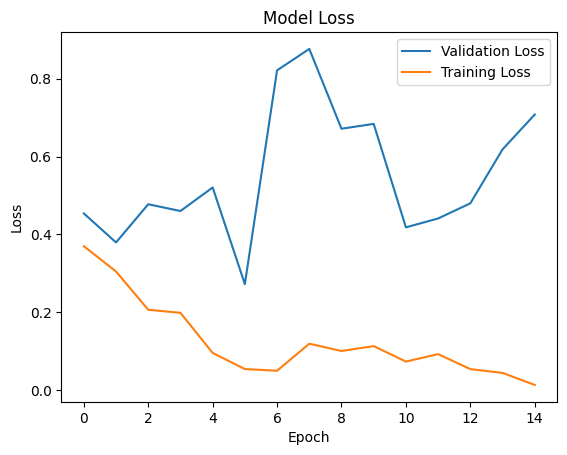

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historyvgg.history['val_loss'])
plt.plot(historyvgg.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Training Loss'], loc='upper right')
plt.show()

In [ ]:
base_loss,base_acc=vgg.evaluate(test_generator)
print("Accuracy of CNN Model: ",base_acc)
print("Loss of CNN Model: ",base_loss)

2/2 [==============================] - 1s 116ms/step - loss: 0.6532 - accuracy: 0.8000
Accuracy of CNN Model:  0.800000011920929
Loss of CNN Model:  0.653217613697052


https://medium.com/@AnasBrital98/vgg-16-and-vgg-19-cnn-architectures-d876f639cab7

### d. Evaluate the performance of architecture number 2c and explain your results. Use the given testing set to predict the ground truth value with the predicted result.

In [ ]:
base_loss,base_acc=vgg.evaluate(test_generator)
print("Accuracy of CNN Model: ",base_acc)
print("Loss of CNN Model: ",base_loss)

2/2 [==============================] - 2s 116ms/step - loss: 0.6532 - accuracy: 0.8000
Accuracy of CNN Model:  0.800000011920929
Loss of CNN Model:  0.653217613697052


Berdasarkan hasil tersebut didapatkan bahwa nilai accuracy dengan menngunakan vgg adalah 0.8 yang artinya sudah lebih bagus daripada model sebelumnya